In [3]:
from keras.datasets import reuters

#load the train and test datas from reuters with each data/newsline having integer value
#not greater than 10000. integers actually represent words in newslines
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

#Encoding the integer sequences present in each newsline of dataset into a binary matrix
#we use one-hot encoding method here
import numpy as np

#defining a function to binarise/vectorise the integer newslines
#function takes no of newslines(sequences) and no of element in each review as I/p matrix
#which is taken as 10000 number vector by broadcasting(????)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #creates an all zero matrix of same i/p matrix size
    for i, sequence in enumerate(sequences):        #for loop counts by enumerating over each newsline/sequences to check sequence/integer inside it
        results[i, sequence] = 1.                   #inside result matrix it sets specific indices corresponding to the integervalue/sequence inside i/sequences to 1
    return results                                  #all other indices in result will be zero => a binary matrix

x_train = vectorize_sequences(train_data)           #calling fn to binarise the train_data
x_test = vectorize_sequences(test_data)             #calling fn to binarise the test_data

#similarly following the same logic for one-hot encoding encoding of labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

enc_train_labels = to_one_hot(train_labels)
enc_test_labels = to_one_hot(test_labels)

#building the neural network/ defining the network layers
#here we use 3 dense layer 1st 2 with o/p size 64, having relu fn and last dense layer with
#o/p size 46, having softmax fn which gives probability dist over 46 o/p classes where each o/P[i] gives a probability 
#that the sample belongs to class i. i as we knos is 46 classes to which we need to classify
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) #i/p shape is 10000 since we created the binary input matrix with each newslinevector(results) having 10000 elements
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#configuring learning process with loss function-rmsprop, optimiser-categorical crossentropy and metrics-accuracy
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

#setting aside validation data set for monitoring the accuracy of the model on data it has never seen before while the training is ongoing
x_val = x_train[:1000]                            #takes first 10000 sequences/newslines for validation
partial_x_train = x_train[1000:]                  #takes the remaining sequences/newslines for training 

y_val = enc_train_labels[:1000]                            #takes first 10000 targets for validation
partial_y_train = enc_train_labels[1000:]                  #takes the remaining targets for training

#network training- iterate on the traning data by calling the fit method of the model
#training is done with 20 epochs/iterations over all samples in partial x&y train datas but
# in mini-batches of 512 samples ata a time in each epoch. At the same time training is validated by checking
#loss and accuracy on 10000 samples set aside as validation data set
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 143us/step - loss: 2.7226 - accuracy: 0.5362 - val_loss: 1.8211 - val_accuracy: 0.6360
Epoch 2/20
7982/7982 [==============================] - 1s 114us/step - loss: 1.4616 - accuracy: 0.7001 - val_loss: 1.3601 - val_accuracy: 0.7040
Epoch 3/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.0794 - accuracy: 0.7653 - val_loss: 1.1726 - val_accuracy: 0.7520
Epoch 4/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.8490 - accuracy: 0.8224 - val_loss: 1.0494 - val_accuracy: 0.7790
Epoch 5/20
7982/7982 [==============================] - 1s 114us/step - loss: 0.6758 - accuracy: 0.8623 - val_loss: 0.9739 - val_accuracy: 0.8020
Epoch 6/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.5424 - accuracy: 0.8905 - val_loss: 0.9382 - val_accuracy: 0.8060
Epoch 7/20
7982/7982 [==============================] - 1s 158us/step - loss

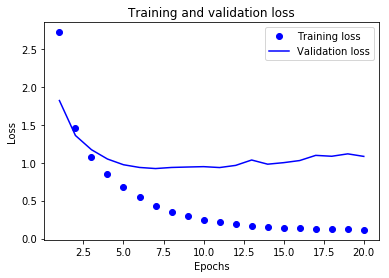

In [11]:
#Plotting training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

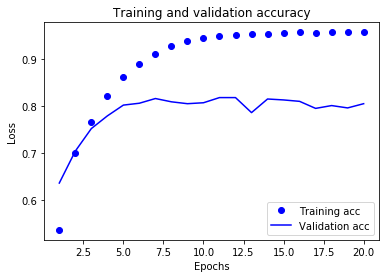

In [10]:
#plotting training and validation accuracy
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
#observed that the network has been overfitted after 9 epochs
#retraining the model with 9 epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

#evaluating the result with test data
results = model.evaluate(x_test, enc_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 131us/step - loss: 2.7332 - accuracy: 0.5437 - val_loss: 1.7985 - val_accuracy: 0.6320
Epoch 2/9
7982/7982 [==============================] - 1s 172us/step - loss: 1.4560 - accuracy: 0.7061 - val_loss: 1.3063 - val_accuracy: 0.7150
Epoch 3/9
7982/7982 [==============================] - 1s 175us/step - loss: 1.0709 - accuracy: 0.7707 - val_loss: 1.1340 - val_accuracy: 0.7480
Epoch 4/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.8468 - accuracy: 0.8198 - val_loss: 1.0257 - val_accuracy: 0.7890
Epoch 5/9
7982/7982 [==============================] - 1s 136us/step - loss: 0.6749 - accuracy: 0.8619 - val_loss: 0.9782 - val_accuracy: 0.8000
Epoch 6/9
7982/7982 [==============================] - 1s 174us/step - loss: 0.5432 - accuracy: 0.8881 - val_loss: 0.9383 - val_accuracy: 0.8080
Epoch 7/9
7982/7982 [==============================] - 1s 120us/step - loss: 0.442

[1.0155101597362188, 0.7831701040267944]

In [26]:
#Generating predictions for a new data
import numpy as np
predictions = model.predict(x_test)
np.argmax(predictions[0]) # gives the predicted topic of 1st news line in test data set

4